# Create Data for Face Detection Model



```
# Abraham Gil Félix | A01750884
```



## Instalación de dependencias

In [1]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.5 MB 5.3 MB/s 
     |████████████████████████████████| 578.0 MB 10 kB/s 
     |████████████████████████████████| 7.7 MB 29.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 82 kB 776 kB/s 
     |████████████████████████████████| 8.4 MB 25.5 MB/s 
     |████████████████████████████████| 344 kB 46.5 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 
     |████████████████████████████████| 511.8 MB 8.5 kB/s 
  Created wheel for labelme: filename=labelme-5.0.5-py3-none-any.whl size=1466328 sha256=f6ba8773050bcf8cb6943c0e3c88093c93e6c5357cbce17babbb78ebb58b6e75
  Stored in directory: /root/.cache/pip/wheels/49/40/cd/725669fac4476235cb12b1ccce7dbe9acbbf7298047100d1d4
  Created wheel for imgviz: filename=imgviz-1.5.1-py

## Importación de librerías

In [2]:
import os
import time
import uuid
import cv2

import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

import albumentations as alb

## Creación del conjunto de imágenes 

In [3]:
IMAGES_PATH = os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data','images')
number_images = 30

"""
cap = cv2.VideoCapture(1)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret, frame = cap.read()
    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname, frame)
    cv2.imshow('frame', frame)
    time.sleep(0.5)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()
"""

"\ncap = cv2.VideoCapture(1)\nfor imgnum in range(number_images):\n    print('Collecting image {}'.format(imgnum))\n    ret, frame = cap.read()\n    imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')\n    cv2.imwrite(imgname, frame)\n    cv2.imshow('frame', frame)\n    time.sleep(0.5)\n\n    if cv2.waitKey(1) & 0xFF == ord('q'):\n        break\ncap.release()\ncv2.destroyAllWindows()\n"

### Etiquetado de imágenes 

In [4]:
!labelme

QObject::moveToThread: Current thread (0x16dc060) is not the object's thread (0x16dd8a0).
Cannot move to target thread (0x16dc060)

qt.qpa.plugin: Could not load the Qt platform plugin "xcb" in "/usr/local/lib/python3.7/dist-packages/cv2/qt/plugins" even though it was found.
This application failed to start because no Qt platform plugin could be initialized. Reinstalling the application may fix this problem.

Available platform plugins are: xcb, eglfs, linuxfb, minimal, minimalegl, offscreen, vnc, wayland-egl, wayland, wayland-xcomposite-egl, wayland-xcomposite-glx, webgl.



### Carga del conjunto de imágenes

In [5]:
images = tf.data.Dataset.list_files('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data/images/*.jpg', 
                                    shuffle=False)

images.as_numpy_iterator().next()

b'/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Te\xcc\x81cnicas y arquitecturas de Deep Learning/FaceDetection/data/images/813ae85d-5a30-11ed-81e7-48a472fee137.jpg'

In [6]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [7]:
images = images.map(load_image)
images.as_numpy_iterator().next()

array([[[152, 178, 177],
        [152, 178, 177],
        [151, 177, 176],
        ...,
        [195, 221, 222],
        [196, 222, 223],
        [197, 223, 224]],

       [[152, 178, 177],
        [152, 178, 177],
        [151, 177, 176],
        ...,
        [193, 221, 222],
        [194, 222, 223],
        [195, 223, 224]],

       [[150, 178, 179],
        [150, 178, 179],
        [149, 178, 176],
        ...,
        [192, 222, 220],
        [192, 222, 220],
        [193, 223, 221]],

       ...,

       [[ 14,  18,  21],
        [ 15,  19,  22],
        [ 16,  20,  21],
        ...,
        [114, 109,  90],
        [122, 117,  97],
        [123, 117,  95]],

       [[ 12,  17,  20],
        [ 13,  18,  21],
        [ 14,  19,  22],
        ...,
        [ 96,  85,  63],
        [110,  98,  74],
        [121, 109,  83]],

       [[ 10,  15,  18],
        [ 11,  16,  19],
        [ 13,  18,  21],
        ...,
        [ 54,  42,  18],
        [ 66,  50,  25],
        [ 79,  63,  37]]

In [8]:
type(images)

tensorflow.python.data.ops.dataset_ops.MapDataset

#### Visualización

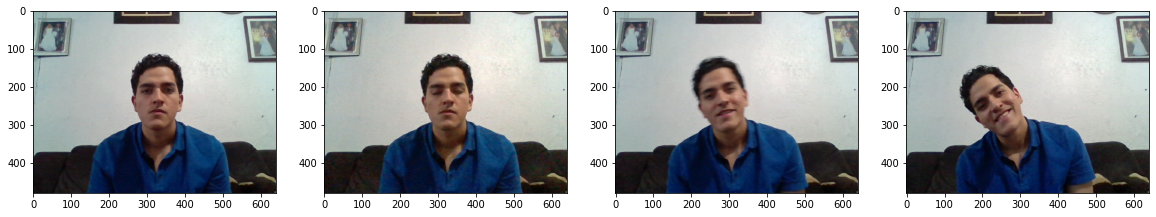

In [9]:
image_generator = images.batch(4).as_numpy_iterator()
plot_images = image_generator.next()

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

### Partición del conjunto de imágenes

El conjunto de datos original cuenta con un total de 90 imágenes, en estás se puede o no apreciar el roostro del sujeto de prueba.

In [10]:
# train set
print("train set: ", round(90*.7, 2)) # 63

train set:  63.0


In [11]:
# validation set
print("validation set: ", round(90*.13, 2)) # 12

train set:  11.7


In [12]:
# test set
print("test set: ", round(90*.17, 2)) # 15

train set:  15.3


### Match labels con el conjunto de imágenes

In [13]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)  

## Expansión del conjunto de imágenes

In [14]:
# Size of the images
img = cv2.imread('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data/train/images/813ae85d-5a30-11ed-81e7-48a472fee137.jpg')
img.shape

(480, 640, 3)

### Transformación para 1 imagen

In [15]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

In [16]:
# with open(os.path.join('data', 'train', 'labels', 'ffd85fc5-cc1a-11ec-bfb8-a0cec8d2d278.json'), 'r') as f:
with open('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data/train/labels/813ae85d-5a30-11ed-81e7-48a472fee137.json', 'r') as f:
    label = json.load(f)

In [17]:
type(label)

dict

In [18]:
label['shapes']

[{'label': 'Abraham',
  'points': [[241.5328467153285, 108.61313868613138],
   [408.68613138686135, 323.2116788321168]],
  'group_id': None,
  'shape_type': 'rectangle',
  'flags': {}}]

In [19]:
# Coordinates
label['shapes'][0]['points']

[[241.5328467153285, 108.61313868613138],
 [408.68613138686135, 323.2116788321168]]

In [20]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

coords

[241.5328467153285, 108.61313868613138, 408.68613138686135, 323.2116788321168]

In [21]:
# 480 x 640 image size
coords = list(np.divide(coords, [640,480,640,480]))
coords

[0.3773950729927008,
 0.2262773722627737,
 0.6385720802919709,
 0.6733576642335766]

In [22]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['Abraham'])
augmented.keys()

dict_keys(['image', 'bboxes', 'class_labels'])

In [23]:
augmented['bboxes'][0][2:]

(0.47659367396593666, 0.6938037307380372)

In [24]:
augmented['bboxes']

[(0.10514193025141927,
  0.21691808596918083,
  0.47659367396593666,
  0.6938037307380372)]

In [25]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

array([[[219, 224, 207],
        [219, 224, 207],
        [220, 223, 206],
        ...,
        [170, 169, 141],
        [169, 168, 140],
        [169, 168, 140]],

       [[219, 224, 207],
        [219, 224, 207],
        [220, 223, 206],
        ...,
        [169, 168, 138],
        [168, 167, 137],
        [169, 168, 138]],

       [[220, 226, 208],
        [220, 226, 208],
        [221, 224, 207],
        ...,
        [168, 167, 137],
        [168, 167, 137],
        [168, 167, 137]],

       ...,

       [[ 34,   6,   3],
        [ 37,   7,   3],
        [ 43,   9,   3],
        ...,
        [ 11,   7,  15],
        [  9,   6,  12],
        [  9,   6,  12]],

       [[ 31,   6,   3],
        [ 35,   7,   3],
        [ 38,   8,   3],
        ...,
        [ 11,   7,  15],
        [ 10,   7,  13],
        [ 10,   7,  13]],

       [[ 30,   6,   3],
        [ 32,   7,   3],
        [ 37,   7,   2],
        ...,
        [ 11,   7,  15],
        [ 10,   7,  13],
        [ 10,   7,  13]]

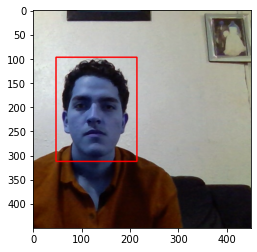

In [26]:
plt.imshow(augmented['image'])

### Transformación para train, test and validation set

In [27]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data', partition, 'images')):
        img = cv2.imread(os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

x_max is less than or equal to x_min for bbox [0.4401231751824818, 0.2338807785888078, 0.16411952554744527, 0.6125304136253041, 'face'].
x_max is less than or equal to x_min for bbox [0.46977645985401467, 0.2095498783454988, 0.2736085766423358, 0.5684306569343066, 'face'].
x_max is less than or equal to x_min for bbox [0.19263229927007303, 0.4406934306569343, 9.581528297040177e-05, 0.9979166666666667, 'face'].


#### Carga del nuevo conjunto de imágenes

In [28]:
train_images = tf.data.Dataset.list_files('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [29]:
test_images = tf.data.Dataset.list_files('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [30]:
val_images = tf.data.Dataset.list_files('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

#### Match labels con el nuevo conjunto de imágenes

In [31]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

In [32]:
train_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [33]:
train_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.419 , 0.3174, 0.7905, 0.7944], dtype=float16))

In [34]:
val_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [35]:
val_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.07855, 0.3481 , 0.4062 , 0.7275 ], dtype=float16))

In [36]:
test_labels = tf.data.Dataset.list_files('/content/drive/MyDrive/7MO SEMESTRE/Inteligencia Artificial Avanzada para la Ciencia de Datos II/M2. Técnicas y arquitecturas de Deep Learning/FaceDetection/aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [37]:
test_labels.as_numpy_iterator().next()

(array([0], dtype=uint8), array([0., 0., 0., 0.], dtype=float16))

## Conjunto de imágenes final

In [38]:
# Size of the datasets
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3600, 3600, 900, 900, 720, 720)

### Train set

In [39]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(4000)
train = train.batch(8)
train = train.prefetch(4)

In [40]:
# 8 images
train.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [0],
        [0],
        [1],
        [0]], dtype=uint8), array([[0.    , 0.3267, 0.4446, 0.7627],
        [0.5596, 0.1613, 0.9976, 0.6997],
        [0.2029, 0.2213, 0.574 , 0.698 ],
        [0.4482, 0.096 , 0.8037, 0.4788],
        [0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.637 , 0.2444, 1.    , 0.7134],
        [0.    , 0.    , 0.    , 0.    ]], dtype=float16))

In [41]:
train.as_numpy_iterator().next()[0].shape

(8, 120, 120, 3)

### Validation set

In [42]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(800)
val = val.batch(8)
val = val.prefetch(4)

In [43]:
val.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1]], dtype=uint8), array([[0.3257 , 0.2507 , 0.689  , 0.5815 ],
        [0.403  , 0.3215 , 0.7305 , 0.701  ],
        [0.7393 , 0.341  , 1.     , 0.7256 ],
        [0.1842 , 0.2803 , 0.559  , 0.7197 ],
        [0.336  , 0.2944 , 0.6636 , 0.6743 ],
        [0.4019 , 0.296  , 0.777  , 0.7354 ],
        [0.434  , 0.12256, 0.8267 , 0.6284 ],
        [0.2236 , 0.3015 , 0.5723 , 0.751  ]], dtype=float16))

### Test set

In [44]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1200)
test = test.batch(8)
test = test.prefetch(4)

In [45]:
test.as_numpy_iterator().next()[1]

(array([[1],
        [1],
        [0],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8), array([[0.5474, 0.3389, 0.9854, 0.879 ],
        [0.    , 0.0834, 0.461 , 0.69  ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.421 , 0.2063, 0.7793, 0.576 ],
        [0.    , 0.    , 0.    , 0.    ],
        [0.3264, 0.2345, 0.69  , 0.6577],
        [0.2286, 0.2345, 0.592 , 0.6577],
        [0.194 , 0.387 , 0.504 , 0.7407]], dtype=float16))

### Visualización

In [46]:
data_samples = train.as_numpy_iterator()

In [47]:
res = data_samples.next()

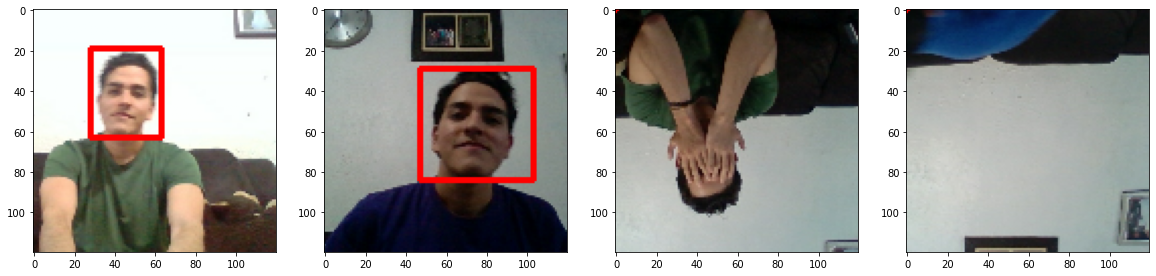

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = res[0][idx]
    sample_coords = res[1][1][idx]
    
    cv2.rectangle(sample_image, 
                  tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[idx].imshow(sample_image)